In [1]:
!pip install web3
import json
from web3 import Web3
import pandas as pd
import numpy as np
import networkx as nx 
from tqdm.notebook import tqdm
import math

In [2]:
def getAmountOut(_amountIn, _reserveIn, _reserveOut, swapFee,_decimalsIn,_decimalsOut):
    _amountIn=_amountIn*(10**_decimalsIn)
    swapFee=swapFee*10
    if((_reserveIn+(_amountIn*(1-swapFee)))==0):
        return 0
    amountOut = (_amountIn*(1000-swapFee)*_reserveOut)/(_reserveIn*1000+(_amountIn*(1000-swapFee)))
    return amountOut/(10**_decimalsOut)

def getAmountIn(_amountOut, _reserveIn, _reserveOut, swapFee,_decimalsIn,_decimalsOut):
    _amountOut=_amountOut*(10**_decimalsOut)
    swapFee=swapFee*100
    amountIn = (_amountOut*1000*_reserveIn)/((_reserveOut-_amountOut)*(1000-swapFee))+1
    return amountIn/(10**_decimalsIn)

def getAmountOutPaper(_amountIn, _reserveIn, _reserveOut, swapFee,_decimalsIn,_decimalsOut):
    _amountIn=_amountIn*(10**_decimalsIn)
    swapFee=swapFee/100
    if((_reserveIn+(_amountIn*(1-swapFee)))==0): #otherwise you divide by zero
        return 0
    amountOut = (_amountIn*(1-swapFee)*_reserveOut)/(_reserveIn+(_amountIn*(1-swapFee)))
    return amountOut/(10**_decimalsOut)

In [3]:
with open("PoolsSpiritSwap.json") as f:
    info_json = json.load(f)
pools = list(info_json)

allTokens = np.unique(np.array(list(map(lambda x:x["tokens"],pools))))
poolMatrix = {}
for i in tqdm(range(0,len(allTokens))):
    obj = {}
    for j in range(0,len(pools)):
        if(allTokens[i] in pools[j]["tokens"])==True:
            otherIndex = 1 if pools[j]["tokens"].index(allTokens[i])==0 else 0
            obj[pools[j]["tokens"][otherIndex]]=pools[j]["indirizzoPool"]
        # else:
        #     obj.append(0)
    poolMatrix[allTokens[i]]=obj

  0%|          | 0/1227 [00:00<?, ?it/s]

In [4]:
dataframe = pd.DataFrame(poolMatrix)
dataframe = dataframe.fillna(0)
dataframe

,0x0050ad58B73F8F604E7F5B87E12DB27145Bff02f,0x00518308350Ba371759730ee091B099F413dF363,0x00C27A9Cb5607C547CeCE27334c47f839f684df3,0x00d19e73B1c9d169cd3E2b324d7e13B033C43CBa,0x01144864c3D5d72b5Ab32853e491E91e36371e8d,0x0128167Cc5634F3D06C8958BE1EC0BCEFee3A0e3,0x012e047b7D0c15D81EFF5F5be2D772a8bc6C2191,0x016096d01268aDe1A14C56F33eB37d37D15E208E,0x01da9D86Be75C2214A7C50Cb3e425d573185A4Ba,0x01f793Ec4dB0ffAf350526ba7828D93C180dd97E,...,0xfB98B335551a418cD0737375a2ea0ded62Ea213b,0xfC86C61b87E3BC3462b2f2ef80632524C23F2d85,0xfDf55e083a726ac942D9403cfFB3dEf97102ee0D,0xfEfc76B5828cA34Ff7856fd457699601f032b13e,0xfa1FBb8Ef55A4855E5688C0eE13aC3f202486286,0xfb535F9cc9d594C24BBdf1E19dABd08B92aAFDf5,0xfc400Ed5a341876163C8860Cafcb98AFAA8CBC9E,0xfcd495AFAFFdEAc77c62745Cc905D05e3fbb3583,0xfdBF6726E87eca67212ACB0bbb66Cb2C974AA794,0xfdDB45FC389605d43888cA9987F2f50283B9422D
0x21be370D5312f44cB42ce377BC9b8a0cEF1A4C83,0x330AB3056848Dcd67bFb7314Db640eFC201C7e84,0x4D10Ea8C2f8803d953d40629c7e0325a207dEc09,0x4ECa839D626c2c5Dc9Fcd82ab4a38E198ea4c56d,0x2D8760be54CF73A8f8E3B23728fD5Bcc72B6d848,0xb278679B434E74E62FCe472042F8C18ee3A2F116,0x684BAd3Bb31113e4286Cb728a3f65876a434f887,0xf3577A373012F972B9251D47796860fbd6fdF1d4,0,0xfcEF3Df7Edf4789d35B63554D24b64FAAFA14EBE,0x12448348455b8f46E4742F72C574D2915442696B,...,0x51Eb93ECfEFFbB2f6fE6106c4491B5a0B944E8bd,0x3E82494436Aa320D3E9112215922C4aeBc8aBab3,0xcED69D914a11e510e508C828c59FBe1d9F3C3bB7,0xEF2a1Ed3574c6b695953DFE9951E3B82F78D7667,0,0x0A95EDE194d0f9D8479a7c26c6B82321660c833d,0x7273d8a381d63dcCdED7b6F834ac5304b371d7B9,0xeF91bB990D6da3B15c5b312d793ED69414eFBB72,0x3e55C62cDdCf2375F774aa2a7550fBa33155EC30,0x7e7a1033E4d697F94c4Aa1d00FF9D971C81dBE6f
0x049d68029688eAbF473097a2fC38ef61633A3C7A,0x9EBe5420EA36B3373DBf4C60B16d7981462E9d9f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0x04068DA6C83AFCFA0e13ba15A6696662335D5B75,0,0,0,0,0,0,0,0xd4Ae527253da3A923D6c96a39FC19b1255F0eBcc,0,0,...,0xd01ED862e51bf50B5f08002775Dc07a5Ca361d25,0,0,0,0,0,0xA465eEA2a07777cF046e98e816a9EF23f23A6354,0,0,0
0x5Cc61A78F164885776AA610fb0FE1257df78E59B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0x9403b56C667E43d42FAE8FbcEB5aF52b4439c302,0,0,0
0xAd84341756Bf337f5a0164515b1f6F993D194E1f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x6bbFdA28E2fAaC31679f972E8610860Cbc64c9C5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0xF01Ed6A2b51F97BDeD9bd0Fc841c2D4B5e28BDb2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0x9FFb67f8cB2aeF1707f629fcab301244421519eD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0xE9F6C04D43Fb147c40EcC15b5Fd59c294417fe5f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
arrayMatrix = dataframe.values
h, w = arrayMatrix.shape
G = nx.DiGraph()
for i in range(h): 
 for j in range(w):
   if arrayMatrix[i][j]!=0: 
     G.add_edge(i,j) 
import matplotlib.pyplot as plt 
plt.figure(5,figsize=(30,30))
ftmIndex = list(dataframe.columns).index("0x21be370D5312f44cB42ce377BC9b8a0cEF1A4C83") #we point out node associated to FTM
color_map = ['red' if node == ftmIndex else '#1f78b4' for node in G]
# nx.draw( G, node_size =50, node_color = color_map) 
# plt.show()

<Figure size 2160x2160 with 0 Axes>

In [6]:
#We reduce the matrix to those tokens which have at least two different pools, eliminating recursively rows and columns
#In this way we eliminate nodes on the boundary and nodes that have very few links (=pools) with other tokens
thresholdNumber = 3 #minimum number of pools (=edges)
filteredDataframe = dataframe
previousShape = (0,0)
while(filteredDataframe.shape!=previousShape):
    print(filteredDataframe.shape,previousShape)
    previousShape = filteredDataframe.shape
    data = (filteredDataframe[(filteredDataframe != 0).sum(1) >= thresholdNumber])
    data = data[data.index]#pd.DataFrame(poolMatrixReduced).loc[pd.DataFrame(poolMatrixReduced).columns]
    filteredDataframe = data

print(filteredDataframe.shape)
filteredDataframe.to_json("PoolsSpiritFiltered.json")

(1227, 1227) (0, 0)
(132, 132) (1227, 1227)
(122, 122) (132, 132)
(122, 122)


In [7]:
filteredDataframe

,0x21be370D5312f44cB42ce377BC9b8a0cEF1A4C83,0x049d68029688eAbF473097a2fC38ef61633A3C7A,0x04068DA6C83AFCFA0e13ba15A6696662335D5B75,0x5Cc61A78F164885776AA610fb0FE1257df78E59B,0xAd84341756Bf337f5a0164515b1f6F993D194E1f,0x8D11eC38a3EB5E956B052f67Da8Bdc9bef8Abf3E,0xaf319E5789945197e365E7f7fbFc56B130523B33,0x181F3F22C9a751E2ce673498A03E1FDFC0ebBFB6,0xE4C2009B9cfF0Be470C01a2223980A0C5C35B4cC,0x10b620b2dbAC4Faa7D7FFD71Da486f5D44cd86f9,...,0x14A6eC51F828e3Ee110170B40360AEC82C8Ba2f7,0x37C045bE4641328DFEB625f1Dde610D061613497,0x0EC4B89462557150302AC6e81270a081F2e3BD20,0x60e91f89A2986975822De3BfE50df002Ef46EaAD,0xbB29D2A58d880Af8AA5859e30470134dEAf84F2B,0x2e79205648B85485731CFE3025d66cF2d3B059c4,0x6ab5660f0B1f174CFA84e9977c15645e4848F5D6,0x070eb1a48725622De867a7E3d1dd4F0108966ED1,0xE1C110E1B1b4A1deD0cAf3E42BfBdbB7b5d7cE1C,0xC61B68D68BA5118afd9048728b4977EbE57130a0
0x21be370D5312f44cB42ce377BC9b8a0cEF1A4C83,0,0xd14Dd3c56D9bc306322d4cEa0E1C49e9dDf045D4,0xe7E90f5a767406efF87Fdad7EB07ef407922EC1D,0x30748322B6E34545DBe0788C421886AEB5297789,0xBaf1B2fD16f7294ca158B3F1065e5f27F9c72b61,0xdbc490b47508D31c9EC44aFB6e132AD01C61A02c,0x0eC0E1629E776272FA3E55548D4A656BE0EEdcF4,0x0c9043cb1B994C8e4a8024e2F037Ea50b7025a82,0xe1feb336B0Cc5344F5E2FdeF510369F7985e8F85,0x4Fe6f19031239F105F753D1DF8A0d24857D0cAA2,...,0x91eB207e6DF4348D223357696b473e0562B86976,0x0133660D0578Bf9D085033Ea753a27F5Aa2b9de1,0xCe88Cb2E040a03697c9Fd5eE5Dc37A08296d70B5,0xdAaca3CA5974626E7BB18B2f2245438e04d128f1,0x5b6B77A6669C4540a905d7Fcb3C2F1916f9eF31c,0x78e70eF4eE5cc72FC25A8bDA4519c45594CcD8d4,0x27228140D72a7186F70eD3052C3318f2D55c404d,0xEB3eC83d338045E36A7F4C1700cc0822eFCA973B,0,0
0x049d68029688eAbF473097a2fC38ef61633A3C7A,0xd14Dd3c56D9bc306322d4cEa0E1C49e9dDf045D4,0,0xe7F86CEf8FEf60ce5050899D1F8e465C00D04a79,0x2E551d7aa1A0494bF696B2F4B0a16880E54b3920,0x0Ec22C6018818ba765A6aB5E8B9C8db0457f967c,0xd3A0c65E5cefceE01FE2B10d04e7C16ea36974dE,0x6a65A67Da11B68CD141581483A9F7A0CB3C47bae,0x9B68C051C36aAb0fC540Ff8b2faf3fB122Ea8e24,0xbC5Db161038d14453816015AFc4713e8C38034e0,0xcbDB4B692391DBE53Cb8d78DB8aAF3Ab2810d039,...,0,0,0,0,0,0,0,0,0,0
0x04068DA6C83AFCFA0e13ba15A6696662335D5B75,0xe7E90f5a767406efF87Fdad7EB07ef407922EC1D,0xe7F86CEf8FEf60ce5050899D1F8e465C00D04a79,0,0xD687dD4b2dca486AB4AaFed87990ecEf4B28c5A1,0x679449a920087828776aeEF4074549410D5c8065,0x9606D683d03f012DDa296eF0ae9261207C4A5847,0xD52c57594F1b62cbA87DBf079608332AbE96e02e,0x5019FEC92d7Ac76ff11fD19127e26A64133fa6c9,0x1C0B79f1f0ACeAde4F2eDf1716E5e542988D63AE,0x35e47d6C3d835e6bC2ffA0674bDD8db80fdC84A1,...,0,0,0,0,0,0,0,0,0,0
0x5Cc61A78F164885776AA610fb0FE1257df78E59B,0x30748322B6E34545DBe0788C421886AEB5297789,0x2E551d7aa1A0494bF696B2F4B0a16880E54b3920,0xD687dD4b2dca486AB4AaFed87990ecEf4B28c5A1,0,0x74772FBe8ea1b9aD1D750D6334Cdb8C3e227D6ED,0xfFbfc0446cA725b21256461e214E9D472f9be390,0xCA4cBd86594B27952a57D476a7052FC246c580C8,0x6B9818c8346a93F7FeDCd3069C5e350a28D783B4,0x9a9bd9dC7D3524705bCEd4bcac7305549b3fc42E,0xFeBbfeA7674720cEdD35e9384d07F235365c1B3e,...,0xa245cEFECBd386D1B62a80760A8cC076cf01479F,0x61aD080F463660A780064d76037D0C2c25117405,0x51D38c9b65B73D879ED9c4D2801fEc9b878fC263,0xc14eeCeF28379b89A74a287ba36aB4689e77C482,0,0,0,0x94F2C393Eca09e04F0e0c1EB0a3c5cea29B8E86F,0xBc7984937c34d8234046EB52649683efC243Cb5e,0
0xAd84341756Bf337f5a0164515b1f6F993D194E1f,0xBaf1B2fD16f7294ca158B3F1065e5f27F9c72b61,0x0Ec22C6018818ba765A6aB5E8B9C8db0457f967c,0x679449a920087828776aeEF4074549410D5c8065,0x74772FBe8ea1b9aD1D750D6334Cdb8C3e227D6ED,0,0x98c8cc0E444CE7490926A6C58484B937CF60E117,0x5091da62bCe1Af040a84786C2680939078063547,0,0x7b2c214350908ec874A40AAA3A1A9654d3a25f22,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x2e79205648B85485731CFE3025d66cF2d3B059c4,0x78e70eF4eE5cc72FC25A8bDA4519c45594CcD8d4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0x8e38543d4c764DBd8f8b98C73407457a3D3b4999,0,0,0
0x6ab5660f0B1f174CFA84e9977c15645e4848F5D6,0x27228140D72a7186F70eD3052C3318f2D55c404d,0,0,0,0,0,0,0,0,0,..

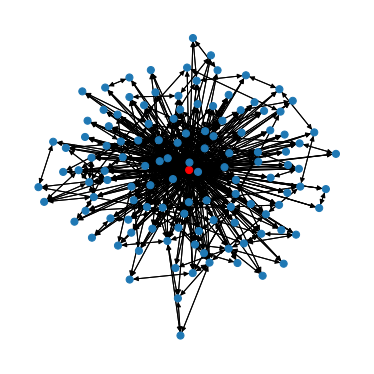

1040


In [8]:
arrayMatrix = filteredDataframe.values
h, w = arrayMatrix.shape
G = nx.DiGraph()
for i in range(h): 
 for j in range(w):
  #  if arrayMatrix[i][j] !=0 and arrayMatrix[i][j] !="0x00": 
#    if "0x" in str(arrayMatrix[i][j]): 
   if arrayMatrix[i][j]!=0: 
      G.add_edge(i,j) 
import matplotlib.pyplot as plt 
plt.figure(5,figsize=(5,5))
ftmIndex = list(filteredDataframe.columns).index("0x21be370D5312f44cB42ce377BC9b8a0cEF1A4C83") #we point out node associated to FTM
color_map = ['red' if node == ftmIndex else '#1f78b4' for node in G]
nx.draw( G,node_size=50, node_color=color_map ) 
plt.show()
print(G.number_of_edges())
#We extracted the matrix associated to the tokens with most links, now we're left to find all the cycles starting from the InputToken and with at least n tokens involved (if we're looking for triangular arbitrage n=3)

In [9]:
# StackOverflow ♥
# we need to filter out all those paths that ping-pongs during the path 
def findPaths(G,u,n):
    if n==0:
        return [[u]]
    paths = [[u]+path for neighbor in G.neighbors(u) for path in findPaths(G,neighbor,n-1)]
    return paths

def find_cycles(G,u,n):
    paths = findPaths(G,u,n)
    return [tuple(path) for path in paths if (path[-1] == u) and sum(x ==u for x in path) == 2]

def find_cycles_not_PingPong(G,u,n):
    paths = findPaths(G,u,n)
    return [tuple(path) for path in paths if (path[-1] == u) and sum(x ==u for x in path) == 2 and sum(prev==next for prev,cur,next in zip([None]+path[:-1], path, path[1:]+[None]))==0] #1) check that the last element is the starting element; 2) check that the starting element is counted just twice in the path; 3) check that previous element of the path is different from the subsequent one


In [10]:
#We define all the cycles that are present in such a matrix: we don't need to do it everytime, it's enough doing it just one time and save the path involving FTM as first input token
#Once we collected the paths, we will ask the information of the pools involved and we will apply recursively (for each path found) the "theorem" of the paper regarding existence of exploitable arbitrages   
# https://42papers.co/pdf/2105.02784.pdf

ftmIndex = list(filteredDataframe.columns).index("0x21be370D5312f44cB42ce377BC9b8a0cEF1A4C83") #for future work, getting confidence with flashloans, starting node may be any "flashloanable" token, not only FTM
tokensInvolvedInCycle = 3 #Put 3 for triangular abitrage
cycles = find_cycles_not_PingPong(G,ftmIndex,tokensInvolvedInCycle) #we extract every cycle (=ordered tuple of nodes) starting from the InputToken and with a length equal to "tokensInvolvedInCycle"

tokenPaths = []
poolsPaths = [] 

#For each cycle, we translate the ordered tuple of nodes in a ordered tuple of tokens and in a ordered tuple of pools (with length n-1) 
for j in range(0,len(cycles)):
    currentCycle = cycles[j]
    cycleTokens=[]
    poolsInvolved = []
    for i in range(0,len(currentCycle)):
        cycleTokens.append(filteredDataframe.columns[currentCycle[i]])
        if(i>0):
            poolsInvolved.append(filteredDataframe[filteredDataframe.columns[currentCycle[i-1]]][filteredDataframe.columns[currentCycle[i]]])
    tokenPaths.append(cycleTokens)
    poolsPaths.append(poolsInvolved)


In [11]:
# Now we remove all those paths in which a same pool is repeated several times in the same path
finalPoolsPaths = []  # we will apply the "theorem" iterating on this list
finalTokenPaths = []
for i in range(0, len(poolsPaths)):
    if(len(set(poolsPaths[i])) == len(poolsPaths[i])):
        finalPoolsPaths.append(poolsPaths[i])
        finalTokenPaths.append(tokenPaths[i])
print(len(finalTokenPaths))
with open('finalPoolsPathsSpirit.json', 'w') as f:
    json.dump(finalPoolsPaths, f)
with open('finalTokenPathsSpirit.json', 'w') as f:
    json.dump(finalTokenPaths, f)
# finalTokenPaths

790


In [12]:
# finalPools1=filteredDataframe.to_numpy().flatten() 
finalPools1 = np.array(finalPoolsPaths).flatten() #pool addresses we will query on the smart contract (associated to tokens that have links at least with "thresholdNumber" other tokens)
finalPools = np.unique(finalPools1[finalPools1!=0])
with open('snipedPoolsSpirit.json', 'w') as f:
    json.dump(finalPools.tolist(), f)
# print(len(finalPools))

C:\Users\Fedem\AppData\Local\Temp/ipykernel_20800/1218382027.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  finalPools = np.unique(finalPools1[finalPools1!=0])


In [13]:

with open("abis/Lifeguard.json") as f:
    info_json = json.load(f)
abi = info_json["abi"]

with open("snipedPoolsSpirit.json") as f:
    info_json = json.load(f)
poolZ = info_json

url = "https://ftm.rpcgator.com/"
# url = "http://localhost:7545"

indirizzoContrattoCustom = "0x3B1699fF06C07C2685d63dE78E183544d8201301" #Mainnet 
# indirizzoContrattoCustom = "0x9A92E06933bB1BBb8C6F48f9259EA8E94bB463b6" #Ganache

w3 = Web3(Web3.HTTPProvider(url))
contrattoSpooky = w3.eth.contract(address=indirizzoContrattoCustom, abi=abi)
pools = contrattoSpooky.functions.getPools(poolZ).call()

In [14]:
# Apply the paper using pools
df = pd.DataFrame(pools)
df.index= df[1]
# df

In [15]:
orderedReserves = [] #in this way we arranged the reserves in the same path of the tokenPath. Odd number will be reserves associated to inputTokens, even numbers those associated to outputTokens
orderedDecimals = []
for i  in range(0,len(finalPoolsPaths)): #list of all pool paths 
    reservePath = []
    decimalPath = [] 
    for j in range(0,len(finalPoolsPaths[i])): #iterating over the i-th pool
        index = df.loc[finalPoolsPaths[i][j]][2].index(finalTokenPaths[i][j])
        otherIndex = 1 if index==0 else 0
        reservePath.append(df.loc[finalPoolsPaths[i][j]][3][index])
        reservePath.append(df.loc[finalPoolsPaths[i][j]][3][otherIndex])
        decimalPath.append(df.loc[finalPoolsPaths[i][j]][4][index])
        decimalPath.append(df.loc[finalPoolsPaths[i][j]][4][otherIndex])
    orderedReserves.append(reservePath)
    orderedDecimals.append(decimalPath)

In [20]:
def doesExistArbitrage(_orderedReserves,_orderedDecimals, _swapFee):
    numerator = 1
    denominator = 1
    _swapFee = _swapFee/100
    _orderedReserves = [_orderedReserves[i]/(10**_orderedDecimals[i]) for i in range(0,len(_orderedReserves))]
    for i in range(0,len(_orderedReserves)): #since reserves are ordered, odd-indexed will be inputTokens (denominator), even-indexed will be outputTokens (numerator)
        if(_orderedReserves[i]==0):
            return False
        if(i%2==0):
            denominator *= _orderedReserves[i]
        else:
            numerator *= _orderedReserves[i]
    return (numerator/denominator)>1/((1-_swapFee)**(len(_orderedReserves)/2))
    # return [(numerator/denominator),1/((1-_swapFee)**(len(_orderedReserves)/2))]

def doesExistArbitrageWithLog(_orderedReserves,_orderedDecimals, _swapFee):
    n=len(_orderedReserves)/2
    if(0 in _orderedReserves):
        return False
    hs = [sum([math.log(_orderedReserves[i]/(10**_orderedDecimals[i])) if (i%2!=0) else 0 for i in range(0,len(_orderedReserves))]),sum([math.log(_orderedReserves[i]/(10**_orderedDecimals[i])) if (i%2==0) else 0 for i in range(0,len(_orderedReserves))])]
    return n*math.log(1-(_swapFee)/100)+hs[0]-hs[1]>0 #mey be possible that the best arbitrage opportunities are those with the highest value here

def computeAmountsOut(_orderedReserves,_orderedDecimals,swapFee,input):
    out = input #the first input
    outArray = []
    for j in range(1,len(_orderedReserves),2):
        out = getAmountOut(out,_orderedReserves[j-1],_orderedReserves[j],swapFee,_orderedDecimals[j-1],_orderedDecimals[j])
        outArray.append(out)
    return outArray

def optimalInput(_orderedReserves,_orderedDecimals,swapFee):
    n = int(len(_orderedReserves)/2)
    reservesIn = np.array([_orderedReserves[i]/(10**_orderedDecimals[i]) for i in range(0,len(_orderedReserves)) if (i%2==0)])
    reservesOut = np.array([_orderedReserves[i]/(10**_orderedDecimals[i]) for i in range(0,len(_orderedReserves)) if (i%2!=0)])
    delta = np.prod(reservesIn)
    beta = np.prod(reservesOut) 
    epsilon = 1-(swapFee/100)
    w = 1
    for i in range(1,n).__reversed__():
        w = np.prod(reservesIn[i:n])+(epsilon*reservesOut[i-1]*w)
    xStar= (-delta+math.pow(math.pow(epsilon,n)*beta*delta,0.5))/(epsilon*w)
    return xStar

In [21]:
#We check the sufficient condition for an arbitrage path:
swapFee = 0.3
outs = []
fullArbs = []
for i in range(0,len(orderedReserves)):
    # if doesExistArbitrage(orderedReserves[i],orderedDecimals[i],swapFee):
    if doesExistArbitrageWithLog(orderedReserves[i],orderedDecimals[i],swapFee):
        xStar = optimalInput(orderedReserves[i],orderedDecimals[i],swapFee)
        outarray = computeAmountsOut(orderedReserves[i],orderedDecimals[i],swapFee,xStar)
        out = outarray[-1]
        outs.append(out)
        fullArb = {}
        fullArb["Tokens"]=finalTokenPaths[i]
        fullArb["Pools"]=finalPoolsPaths[i]
        fullArb["Reserves"]=orderedReserves[i]
        fullArb["Decimals"]=orderedDecimals[i]
        fullArb["Input"] = xStar
        fullArb["Outs"]=outarray
        fullArb["Gain"]=out-xStar
        fullArbs.append(fullArb)
        # if(out>xStar):
        #     print(out)
        #     print(outarray)
        #     print("Tokens",finalTokenPaths[i], "Pools", finalPoolsPaths[i], "Reserves", orderedReserves[i], "Decimals",orderedDecimals[i], "\n")
print(max(fullArbs,key=lambda x:x["Gain"]))

{'Tokens': ['0x21be370D5312f44cB42ce377BC9b8a0cEF1A4C83', '0x04068DA6C83AFCFA0e13ba15A6696662335D5B75', '0x6ECED8E16eDA61E65292f019B165542A5906ecD6', '0x21be370D5312f44cB42ce377BC9b8a0cEF1A4C83'], 'Pools': ['0xe7E90f5a767406efF87Fdad7EB07ef407922EC1D', '0x27A2c9CF757424142d262fc6A736C69aF62F1159', '0xD24cf15F02D1cC4C868C303925aDF247118CAd9B'], 'Reserves': [8427929375496826962598095, 14625036291730, 674848762, 729201141368610084123, 6430187893973311355737, 3838915829517707001429], 'Decimals': [18, 6, 6, 18, 18, 18], 'Input': 18.726794466498834, 'Outs': [32.39915659900352, 33.309200940708386, 19.724550697327384], 'Gain': 0.9977562308285499}


In [25]:
def doesExistArbitrageWithLog(_orderedReserves,_orderedDecimals, _swapFee):
    n=len(_orderedReserves)/2
    if(0 in _orderedReserves):
        return False
    hs = [sum([math.log(_orderedReserves[i]/(10**_orderedDecimals[i])) if (i%2!=0) else 0 for i in range(0,len(_orderedReserves))]),sum([math.log(_orderedReserves[i]/(10**_orderedDecimals[i])) if (i%2==0) else 0 for i in range(0,len(_orderedReserves))])]
    return print(n*math.log(1-(_swapFee)/100)+hs[0]-hs[1])#>0 #mey be possible that the best arbitrage opportunities are those with the highest value here

swapFee = 0.3
reserves = [8427929375496826962598095, 14625036291730, 674848762, 729201141368610084123, 6430187893973311355737, 3838915829517707001429]
decimals = [18, 6, 6, 18, 18, 18]

doesExistArbitrageWithLog(reserves, decimals,swapFee)

0.10381746133664294
